In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np
from IPython.display import Image

In [4]:
%cd /content/drive/MyDrive/yolov5/yolov5

/content/drive/MyDrive/yolov5/yolov5


In [ ]:
#!git clone https://github.com/ultralytics/yolov5

In [ ]:
#%cd yolov5/

In [ ]:
#!pip install -r requirements.txt

# Training The Data

In [ ]:
#!python train.py --img 415 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --cache

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolov5/yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-7-12 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [7]:
img = '/content/drive/MyDrive/yolov5/yolov5/data/images/val/thumbsup00002.jpg'
results = model(img)

In [8]:
results.print()

image 1/1: 490x612 2 thumbsups
Speed: 663.1ms pre-process, 484.5ms inference, 13.3ms NMS per image at shape (1, 3, 544, 640)


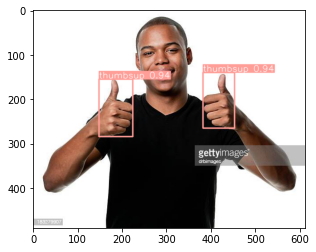

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
"""from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))"""

In [17]:
result = model(take_photo())
result.print()

<IPython.core.display.Javascript object>

image 1/1: 480x640 1 thumbsup
Speed: 10.7ms pre-process, 302.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)


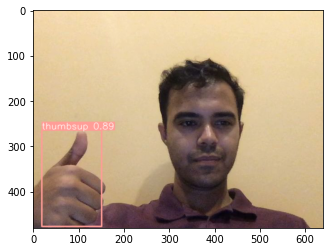

In [18]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))

In [19]:
result2 = model(take_photo())
result2.print()

<IPython.core.display.Javascript object>

image 1/1: 480x640 1 livelong
Speed: 9.8ms pre-process, 302.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)


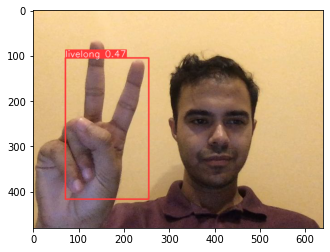

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(result2.render()))